<a href="https://colab.research.google.com/github/AvanNorth/RobotsItis2022/blob/main/Gareev_11_002_DZ_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

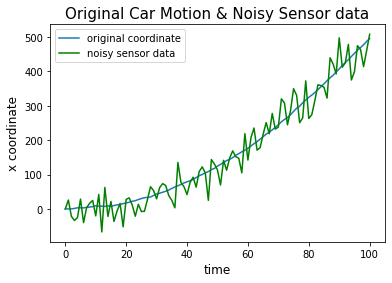

In [13]:
# Creation of noisy data
import numpy as np
import matplotlib.pyplot as plt

N = 100
muPsi = 0
sigmaPsi = 1
muEta = 0
sigmaEta = 35
a = 0.1  # acceleration
x = np.zeros(N+1)
z = np.zeros(N+1)
filteredX = np.zeros(N+1)

time = np.arange(0, N+1, 1)

for t in range(0, N):
    x[t+1] = x[t] + a * t + np.random.normal(muPsi, sigmaPsi, 1)
    z[t+1] = x[t+1] + np.random.normal(muEta, sigmaEta, 1)

plt.title('Original Car Motion & Noisy Sensor data',fontsize=15)
plt.xlabel('time',fontsize=12)
plt.ylabel('x coordinate',fontsize=12)    
plt.plot(time, x, label='original coordinate')  
plt.plot(time, z, 'g', label='noisy sensor data')  
plt.legend()

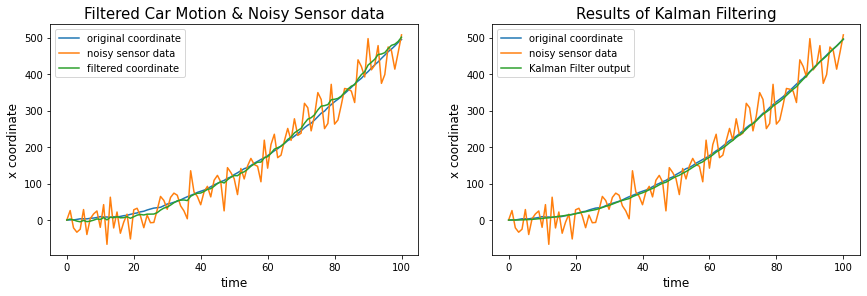

In [16]:
alpha = 0.1

for t in range(0, N):
  filteredX[t+1] = filteredX[t] + a*t + alpha * (z[t+1] - filteredX[t])

plt.subplot(1,2,1)
plt.title('Filtered Car Motion & Noisy Sensor data',fontsize=15)
plt.xlabel('time',fontsize=12)
plt.ylabel('x coordinate',fontsize=12)    
plt.plot(time, x, label='original coordinate')  
plt.plot(time, z, label='noisy sensor data')  
plt.plot(time, filteredX, label='filtered coordinate')  
plt.legend()

#Linear Kalman Filtering
eOpt = np.zeros(N+1)
K    = np.zeros(N+1)
xOpt = np.zeros(N+1)

for t in range(0, N):
    eOpt[t+1] = np.sqrt((sigmaEta**2) * (eOpt[t]**2 + sigmaPsi**2)/(sigmaEta**2 + eOpt[t]**2 + sigmaPsi**2))
    K[t+1] = (eOpt[t+1]**2)/(sigmaEta**2)
    xOpt[t+1] = (xOpt[t]+a*t) * (1-K[t+1]) + K[t+1]*z[t+1]

plt.subplot(1,2,2)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Results of Kalman Filtering',fontsize=15)
plt.xlabel('time',fontsize=12)
plt.ylabel('x coordinate',fontsize=12)
plt.plot(time, x, label='original coordinate')  
plt.plot(time, z, label='noisy sensor data')  
plt.plot(time, xOpt, label='Kalman Filter output') 
plt.legend()
plt.subplots_adjust(bottom=0.1, right=2, top=0.9)